In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm

# Importing Data

In [3]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Distribution

<ipython-input-5-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

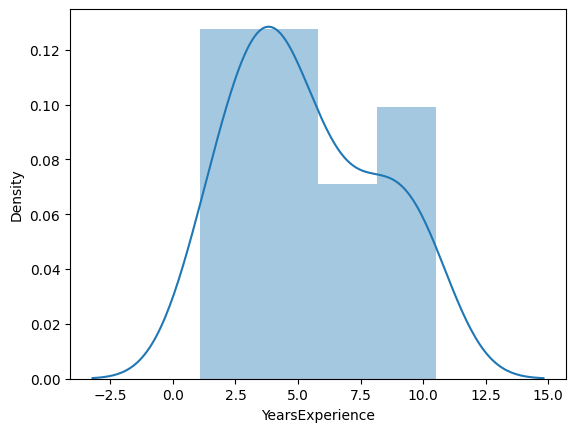

In [5]:
sns.distplot(data['YearsExperience'])

<ipython-input-6-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

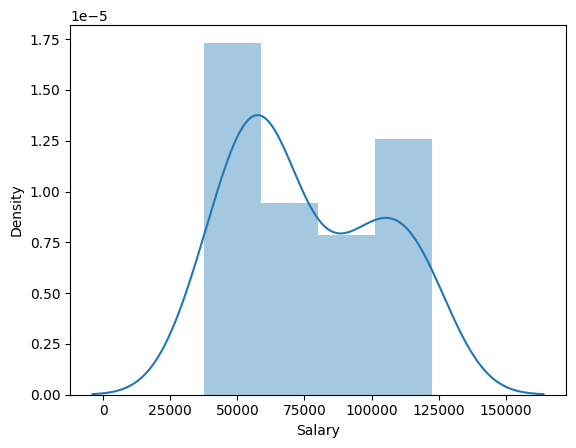

In [6]:
sns.distplot(data['Salary'])

# Feature Engineering(EDA)

In [7]:
#Check for any null values
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: >

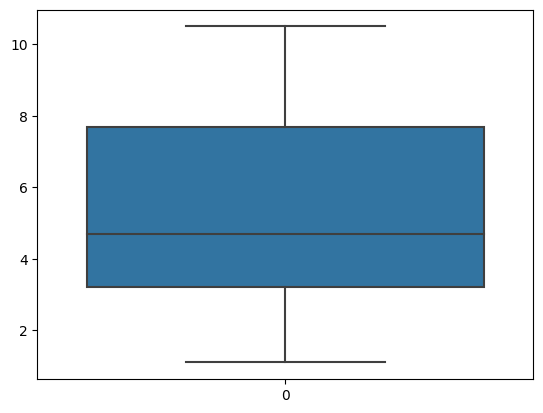

In [8]:
#Check for ouliers in Delivery time column
sns.boxplot(data["YearsExperience"])

<Axes: >

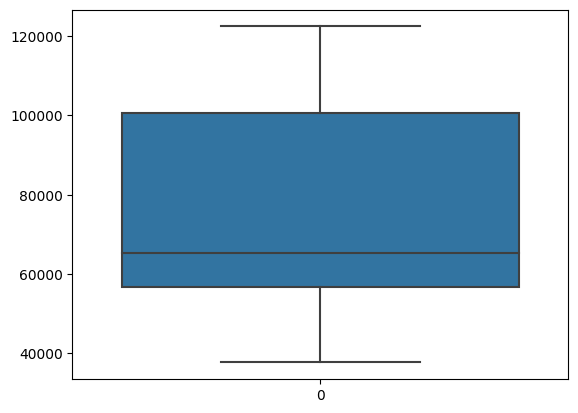

In [9]:
sns.boxplot(data["Salary"])

In [10]:
#No outliers present,No Null values

# Correlation Analysis

In [11]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
#YearsExperience and Salary has a positive correlation. Its value almost near to 1

<Axes: xlabel='YearsExperience', ylabel='Salary'>

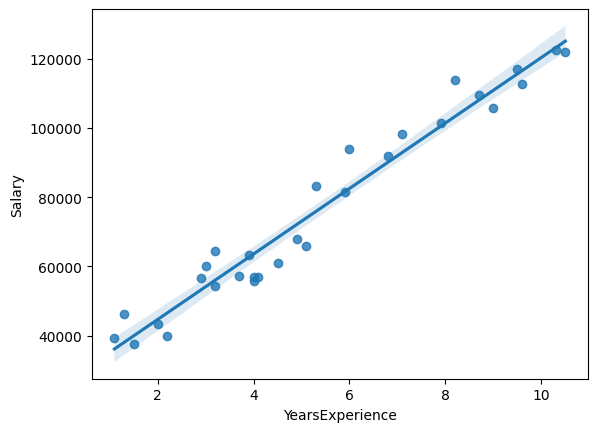

In [13]:
sns.regplot(x="YearsExperience", y="Salary", data=data)

# SLR Model Building

In [14]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

# Model Summary

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        12:49:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

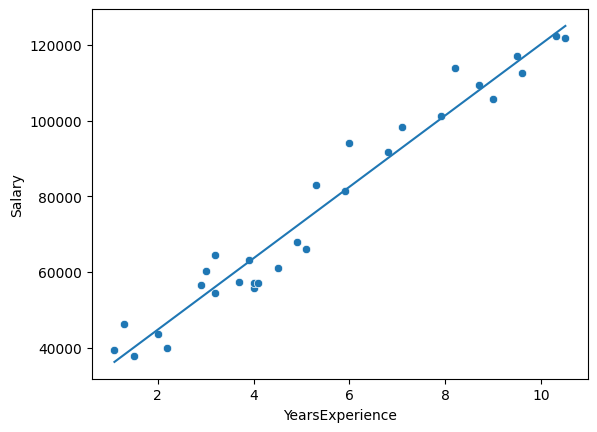

In [16]:
#R squre value is high so Model is acceptable
pre_sal = model.predict(data['YearsExperience'])
sns.scatterplot(x="YearsExperience",y="Salary",data=data)
sns.lineplot(x="YearsExperience",y=pre_sal,data=data)

In [24]:
pred = model.predict(data['YearsExperience'])
rmse = np.sqrt(np.mean((np.array(data["YearsExperience"])-np.array(pred))**2))
rmse

80440.84508275456

# Transformation of model by Squaring independent variable

In [28]:
model1 = smf.ols("Salary~YearsExperience*YearsExperience",data = data).fit()

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        12:53:16   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

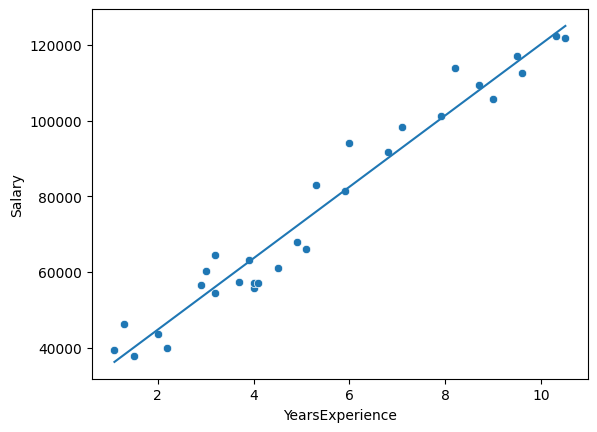

In [33]:
#R squre value is high so Model is acceptable
pre_sal = model1.predict(data['YearsExperience'])
sns.scatterplot(x="YearsExperience",y="Salary",data=data)
sns.lineplot(x="YearsExperience",y=pre_sal,data=data)

In [36]:
pred = model1.predict(data['YearsExperience'])
rmse = np.sqrt(np.mean((np.array(data["YearsExperience"])-np.array(pred))**2))
rmse

80440.84508275456

# Transformation of model by Square rooting independent variable

In [35]:
model2 = smf.ols("Salary~np.sqrt(YearsExperience)",data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           8.57e-18
Time:                        12:59:26   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

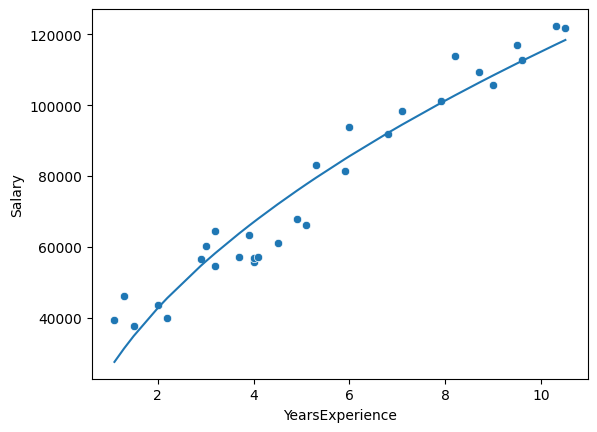

In [32]:
#R squre value is high so Model is acceptable
pre_sal = model2.predict(data['YearsExperience'])
sns.scatterplot(x="YearsExperience",y="Salary",data=data)
sns.lineplot(x="YearsExperience",y=pre_sal,data=data)

In [34]:
pred = model2.predict(data['YearsExperience'])
rmse = np.sqrt(np.mean((np.array(data["YearsExperience"])-np.array(pred))**2))
rmse

80323.57210666328

# Transformation of model by Square rooting both independent variable and dependent variable

In [42]:
model3 = smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)",data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           7.58e-19
Time:                        13:02:41   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

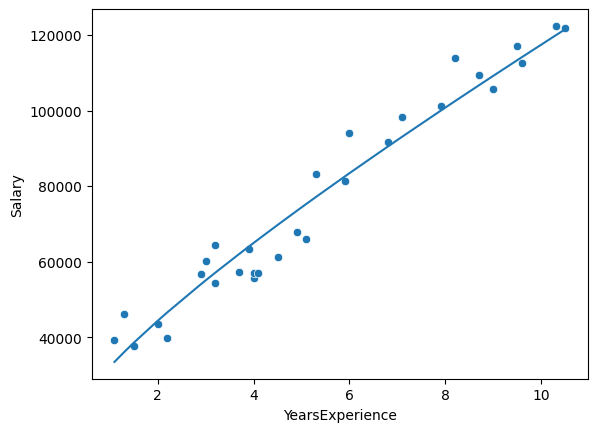

In [43]:
#R squre value is high so Model is acceptable
pre_sal = model3.predict(data['YearsExperience'])
pre_sal = pre_sal**2
sns.scatterplot(x="YearsExperience",y="Salary",data=data)
sns.lineplot(x="YearsExperience",y=pre_sal,data=data)

In [47]:
pred = model3.predict(data['YearsExperience'])
pred = pred**2
rmse = np.sqrt(np.mean((np.array(data["YearsExperience"])-np.array(pred))**2))
rmse

80097.813244105

# Transformation of model by Cube rooting independent variable

In [51]:
model4 = smf.ols("Salary~np.cbrt(YearsExperience)",data = data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     287.7
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.91e-16
Time:                        13:06:49   Log-Likelihood:                -312.29
No. Observations:                  30   AIC:                             628.6
Df Residuals:                      28   BIC:                             631.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -5.705e+04   7989.534     -7.141      0.000   -7.34e+04   -4.07e+04
np.cbrt(YearsExperience)  7.896e+04   4655.395     16.962      0.000    6.94e+04    8.85e+04
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.575
Skew:                           0.047   Prob(JB):                        0.750
Kurtosis:                       2.328   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='YearsExperience', ylabel='Salary'>

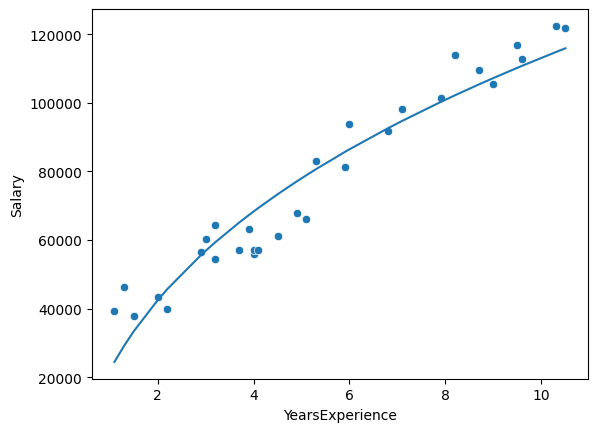

In [52]:
#R squre value is high so Model is acceptable
pre_sal = model4.predict(data['YearsExperience'])
sns.scatterplot(x="YearsExperience",y="Salary",data=data)
sns.lineplot(x="YearsExperience",y=pre_sal,data=data)

In [53]:
pred = model4.predict(data['YearsExperience'])
rmse = np.sqrt(np.mean((np.array(data["YearsExperience"])-np.array(pred))**2))
rmse

80234.49057343177

# Model Prediction

In [54]:
# Best model is no transformation model it has highest r square value.
# Automatic Prediction for say sorting time 10,4
new_data=pd.Series([10,4])
new_data

0    10
1     4
dtype: int64

In [55]:
data_Year = pd.DataFrame(new_data,columns=["YearsExperience"])
data_Year

,YearsExperience
0,10
1,4


In [56]:
pred_sal = model.predict(data_Year)
pred_sal

0    120291.823413
1     63592.049484
dtype: float64

In [57]:
Final_result = pd.DataFrame({'YearsExperience': data_Year['YearsExperience'],'Salary' :pred_sal})
Final_result

,YearsExperience,Salary
0,10,120291.823413
1,4,63592.049484
